In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [6]:
data=pd.read_csv('crime_data.csv',)
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [10]:
data1=data.drop(['Unnamed: 0'],axis=1)

In [11]:
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# hierarchical clustering

In [12]:
def norm_func(i):
    X=(i-i.min())/(i.max()-i.min())
    return(X)

In [14]:
df_norm=norm_func(data1)
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


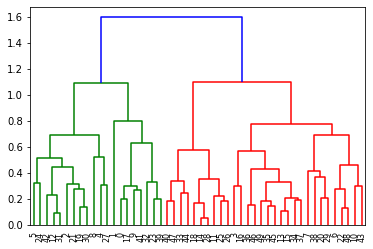

In [22]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [23]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

In [24]:
y_hc=hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc,columns=['cluster'])

In [25]:
clusters

,cluster
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [38]:
df_row=pd.concat([clusters,data1],axis=1)

In [39]:
df_row

,cluster,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,0,10.0,263,48,44.5
2,3,8.1,294,80,31.0
3,1,8.8,190,50,19.5
4,3,9.0,276,91,40.6
5,3,7.9,204,78,38.7
6,1,3.3,110,77,11.1
7,1,5.9,238,72,15.8
8,3,15.4,335,80,31.9
9,0,17.4,211,60,25.8


In [40]:
df_row.cluster.value_counts()

1    20
3    12
2    10
0     8
Name: cluster, dtype: int64

In [41]:
df_row2=df_row.groupby(df_row.cluster).mean()

In [42]:
df_row2

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


# k_means

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

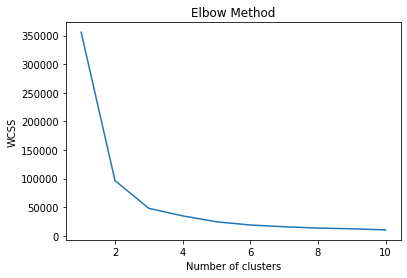

In [74]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
model=KMeans(n_clusters=3)
model.fit(df_norm)
model.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [76]:
md=pd.Series(model.labels_)
data['clust']=md
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [78]:
md

0     1
1     1
2     1
3     2
4     1
5     1
6     2
7     2
8     1
9     1
10    2
11    0
12    1
13    2
14    0
15    2
16    0
17    1
18    0
19    1
20    2
21    1
22    0
23    1
24    2
25    0
26    0
27    1
28    0
29    2
30    1
31    1
32    1
33    0
34    2
35    2
36    2
37    2
38    2
39    1
40    0
41    1
42    1
43    2
44    0
45    2
46    2
47    0
48    0
49    2
dtype: int32

In [79]:
data2=data.groupby(data.clust).mean()
data2

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


# DBSCAN

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [51]:
array=data1.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [52]:
stscaler=StandardScaler().fit(array)

In [53]:
X=stscaler.transform(array)

In [54]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [67]:
X.mean()

1.021405182655144e-16

In [68]:
dbscan=DBSCAN(eps=1.1,min_samples=4)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [69]:
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1, -1,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [70]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,-1
2,1
3,2
4,-1
5,-1
6,2
7,-1
8,-1
9,-1


In [71]:
data3=pd.concat([c1,data1],axis=1)

In [72]:
data3

,cluster,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,-1,10.0,263,48,44.5
2,1,8.1,294,80,31.0
3,2,8.8,190,50,19.5
4,-1,9.0,276,91,40.6
5,-1,7.9,204,78,38.7
6,2,3.3,110,77,11.1
7,-1,5.9,238,72,15.8
8,-1,15.4,335,80,31.9
9,-1,17.4,211,60,25.8


In [73]:
data3.cluster.value_counts()

 2    30
 1     7
-1     7
 0     6
Name: cluster, dtype: int64